# Nonlinear beam dynamics - tracking demo

This particle tracking simulation uses a simple model of a circular machine built of identical cells.
Each cell contains a sextupole and an octupole in thin lense approximation at its end.
For simplicity, we asume twiss functions of $\beta_x=1$ and $\alpha_x=0$ at the location of the multipoles, such that the transfer map of the cell is a simple rotation in phase space.

A given number of particles with initial transverse position $x=a \cdot x_{max}$ and divergence $p_x=a \cdot p_{x,max}$, $a \in [0;1]$, is tracked around the machine for the given number of turns.

The machine tune as well as the number of cells in the machine and the strength of the multipoles can be adjusted to study the nonlinear dynamics, formation of stable islands, amplitude detuning etc.
For convenience, some presets are also available.

In [1]:
from nonlinear_tracking_interactive import Dashboard
%matplotlib widget
#d = Dashboard(q=0.203, k2l=0.1, k3l=0, ncells=1, nparticles=50, xmax=17, pxmax=-2, nturns=10000, average=True)  # pass initial values
d = Dashboard()
d

Dashboard(children=(Controls(children=(HBox(children=(VBox(children=(BoundedFloatText(value=0.203, description…

-----------------------
Here's an example of how to further use and visualise the data from the dashboard:

In [54]:
import matplotlib.pyplot as plt
import numpy as np

In [55]:
ncells, q, k2l, k3l, (x, px), amplitude, angle, tune, = d.data
nparticle, nturns = x.shape

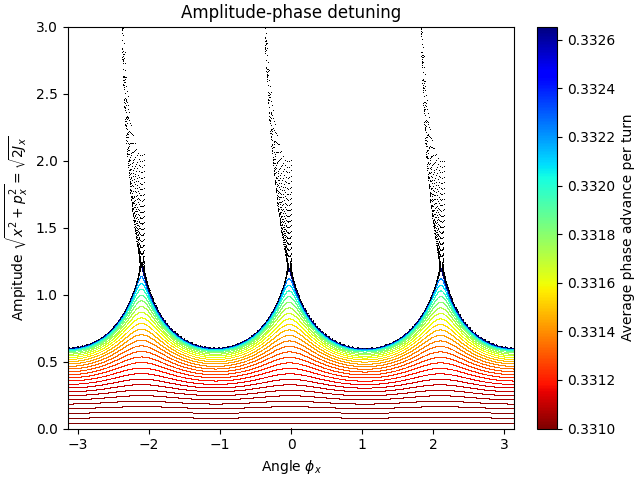

In [56]:
fig, ax = plt.subplots(constrained_layout=True)

detuning = np.mean(tune, axis=1)  # colorcode: average tune per particle
detuning = np.repeat(detuning, nturns).reshape((nparticle, nturns))
plot = ax.scatter(angle, amplitude, c=detuning, s=(72/fig.dpi)**2, marker=',', lw=0, cmap='jet_r')
ax.scatter(angle[~np.isfinite(detuning)], amplitude[~np.isfinite(detuning)], c='k', s=(72/fig.dpi)**2, marker=',', lw=0)

fig.colorbar(plot, label='Average phase advance per turn')
ax.set(xlabel='Angle $\phi_x$',
       xlim=(-np.pi, np.pi),
       ylabel='Ampitude $\\sqrt{x^2+p_x^2}=\\sqrt{2 J_x}$',
       ylim=(0,1.5*np.max(amplitude[:,0])),
       title='Amplitude-phase detuning')

None